<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;"> 

## Introducción
Este notebook tiene como objetivo realizar un análisis de transacciones utilizando técnicas de minería de datos, específicamente el algoritmo Apriori para la generación de reglas de asociación. A lo largo del documento, se llevan a cabo las siguientes tareas:

1. **Carga y preparación de datos**: Se importan los datos de transacciones en formato basket, anteriormente preparados en tableau, utilizando el flujo proporcionado más abajo, y se preparan para el análisis, eliminando columnas innecesarias y asegurando el formato adecuado.

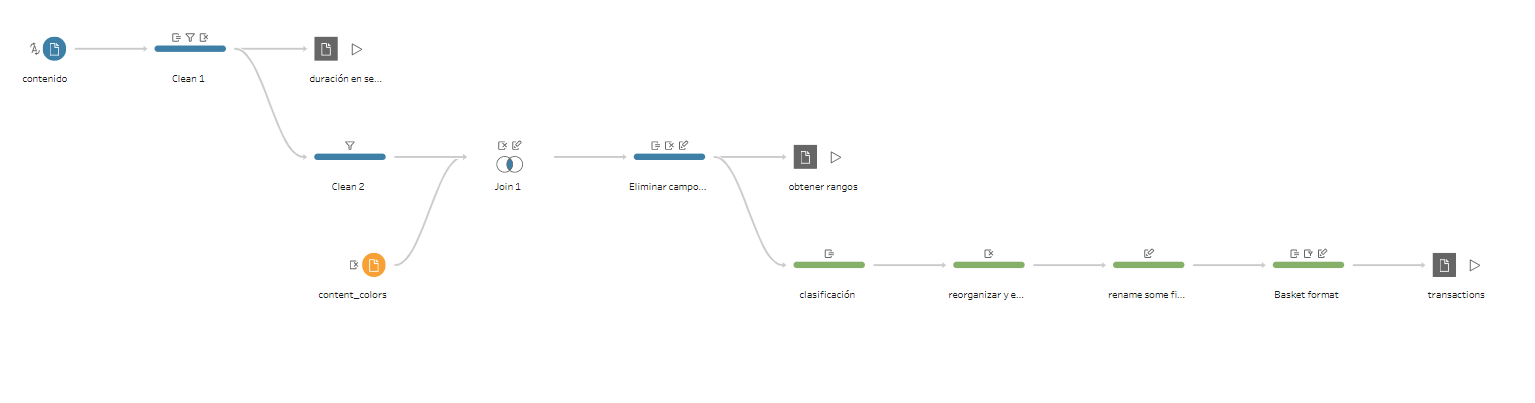

2. **Visualización de datos**: Se generan gráficos para visualizar la distribución del tamaño de las transacciones y la frecuencia de los ítems.
3. **Generación de itemsets frecuentes**: Se aplica el algoritmo Apriori para identificar conjuntos de ítems que aparecen frecuentemente juntos en las transacciones.
4. **Generación de reglas de asociación**: Se crean reglas de asociación basadas en los itemsets frecuentes, utilizando umbrales de soporte y confianza definidos.
5. **Evaluación de reglas**: Se calculan métricas adicionales para evaluar la calidad de las reglas generadas, como la cobertura y el test exacto de Fisher.
6. **Filtrado y visualización de reglas**: Se filtran y visualizan las reglas más interesantes, enfocándose en aquellas con mayor confianza y relevancia.

Este análisis permite identificar patrones y relaciones significativas entre los ítems en las transacciones, proporcionando información valiosa para la toma de decisiones en áreas como marketing, ventas, gestión de inventarios y a exitos de videos de youtube(como en el caso presente).

</div>

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;"> 

## Desarrollo
</div>

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;"> 
    <ul>
        <li><strong>Propósito general:</strong> Esta celda carga el paquete <code>tidyverse</code> en R, que es una colección de paquetes diseñados para el análisis de datos de manera eficiente.</li>
        <li><strong>Componentes incluidos:</strong> 
            <ul>
                <li><code>ggplot2</code>: Para visualización de datos.</li>
                <li><code>dplyr</code>: Para manipulación de datos.</li>
                <li><code>tidyr</code>: Para estructuración de datos.</li>
                <li><code>readr</code>: Para importar datos.</li>
                <li><code>purrr</code>: Para programación funcional.</li>
                <li><code>tibble</code>: Para trabajar con data frames modernos.</li>
            </ul>
        </li>
        <li><strong>Uso común:</strong> Este paquete simplifica las tareas de limpieza, transformación y visualización de datos en proyectos de análisis y ciencia de datos.</li>
        <li><strong>Requisitos previos:</strong> Es necesario que el paquete <code>tidyverse</code> esté instalado en el entorno. Si no está instalado, se puede hacer con <code>install.packages("tidyverse")</code>.</li>
    </ul>
</div>


In [24]:
library(tidyverse)

In [25]:
datos <- read.csv("../../datasets/transactions.csv")
head(datos, 8)

,content_id,items
,<int>,<chr>
1,1,"duracion_promedio_vistas bajas,Friday,vistas altas,tiempo_reproduccion_horas altas,suscriptores altos,impresiones altas,ctr bajo,Trivia Facts Quiz,General,cantidad de tags baja,Blue,sugerido,Es popular"
2,2,"duracion_promedio_vistas altas,Thursday,vistas altas,tiempo_reproduccion_horas altas,suscriptores media,impresiones altas,ctr medio,Entertainment Quiz,General,cantidad de tags baja,Dark Blue,sugerido,Es popular"
3,3,"duracion_promedio_vistas bajas,Friday,vistas altas,tiempo_reproduccion_horas bajas,suscriptores media,impresiones altas,ctr alto,Trivia Facts Quiz,Children,cantidad de tags baja,Red,sugerido,Es popular"
4,4,"duracion_promedio_vistas medias,Thursday,vistas altas,tiempo_reproduccion_horas medias,suscriptores media,impresiones altas,ctr medio,Entertainment Quiz,General,cantidad de tags baja,Dark Blue,sugerido,Es popular"
5,5,"duracion_promedio_vistas altas,Friday,vistas altas,tiempo_reproduccion_horas bajas,suscriptores bajos,impresiones altas,ctr bajo,Would You Rather,General,cantidad de tags baja,Yellow,sugerido,No es popular"
6,8,"duracion_promedio_vistas medias,Thursday,vistas altas,tiempo_reproduccion_horas bajas,suscriptores bajos,impresiones altas,ctr medio,Holidays,General,cantidad de tags alta,Purple,sugerido,Es popular"
7,15,"duracion_promedio_vistas altas,Wednesday,vistas altas,tiempo_reproduccion_horas bajas,suscriptores bajos,impresiones altas,ctr bajo,Would You Rather,General,cantidad de tags baja,Purple,sugerido,No es popular"
8,16,"duracion_promedio_vistas medias,Thursday,vistas medias,tiempo_reproduccion_horas bajas,suscriptores bajos,impresiones medias,ctr bajo,Would You Rather,Children,cantidad de tags baja,Purple,sugerido,No es popular"


<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Este código prepara un conjunto de datos para ser utilizado en un análisis de transacciones estilo "basket" (cesta de compras), eliminando columnas innecesarias y asegurando que el formato cumpla con los requisitos esperados.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>datos$content_id <- NULL</code>: Esta línea elimina la columna <code>content_id</code> del conjunto de datos. En el análisis estilo "basket", solo debe haber una columna que contenga la lista de todos los items de las transacciones. La columna <code>content_id</code> es innecesaria para este propósito.</li>
                <li><code>colnames(datos) <- c("items")</code>: Renombra la única columna restante en el data frame como <code>items</code> para reflejar su propósito, que es contener todos los artículos comprados en cada transacción.</li>
            </ul>
        </li>
        <li><strong>Nota aclaratoria:</strong> En un análisis estilo "basket", cada fila representa una transacción y debe contener únicamente una columna con los elementos asociados a esa transacción. Este formato fue seleccionado por conveniencia para utilizar el algoritmo Apriori.</li>
    </ul>
</div>


In [26]:
datos$content_id <- NULL
colnames(datos) <- c("items")

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Esta celda realiza dos acciones principales: guarda el conjunto de datos procesado en un archivo CSV y muestra las primeras filas de los datos para verificación.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>write.csv(datos, "../../datasets/transactions_formated.csv", quote = FALSE, row.names = TRUE)</code>:  
                    <ul>
                        <li>Guarda el conjunto de datos <code>datos</code> en un archivo CSV ubicado en <code>../../datasets/transactions_formated.csv</code>.</li>
                        <li><code>quote = FALSE</code>: Indica que las cadenas de texto no deben estar entre comillas en el archivo generado.</li>
                        <li><code>row.names = TRUE</code>: Incluye los nombres de las filas como una columna adicional en el archivo CSV. Esto puede ser útil si las filas tienen identificadores importantes.</li>
                    </ul>
                </li>
                <li><code>head(datos)</code>:  
                    <ul>
                        <li>Muestra las primeras seis filas del conjunto de datos <code>datos</code>.</li>
                        <li>Esto permite verificar que los datos se hayan procesado correctamente antes de guardarlos y facilita una inspección rápida del formato final.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Requisitos previos:</strong> 
            <ul>
                <li>El conjunto de datos <code>datos</code> debe estar preparado y estructurado adecuadamente.</li>
                <li>La ruta <code>../../datasets/</code> debe existir y tener permisos de escritura para almacenar el archivo CSV.</li>
            </ul>
        </li>
        <li><strong>Resultados esperados:</strong>
            <ul>
                <li>Un archivo llamado <code>transactions_formated.csv</code> que contiene los datos procesados en el formato esperado.</li>
                <li>La salida en consola de las primeras seis filas del conjunto de datos, mostrando la columna <code>items</code>.</li>
            </ul>
        </li>
    </ul>
</div>


In [27]:
write.csv(datos, "../../datasets/transactions_formated.csv",
          quote = FALSE, row.names = TRUE)
head(datos)

,items
,<chr>
1,"duracion_promedio_vistas bajas,Friday,vistas altas,tiempo_reproduccion_horas altas,suscriptores altos,impresiones altas,ctr bajo,Trivia Facts Quiz,General,cantidad de tags baja,Blue,sugerido,Es popular"
2,"duracion_promedio_vistas altas,Thursday,vistas altas,tiempo_reproduccion_horas altas,suscriptores media,impresiones altas,ctr medio,Entertainment Quiz,General,cantidad de tags baja,Dark Blue,sugerido,Es popular"
3,"duracion_promedio_vistas bajas,Friday,vistas altas,tiempo_reproduccion_horas bajas,suscriptores media,impresiones altas,ctr alto,Trivia Facts Quiz,Children,cantidad de tags baja,Red,sugerido,Es popular"
4,"duracion_promedio_vistas medias,Thursday,vistas altas,tiempo_reproduccion_horas medias,suscriptores media,impresiones altas,ctr medio,Entertainment Quiz,General,cantidad de tags baja,Dark Blue,sugerido,Es popular"
5,"duracion_promedio_vistas altas,Friday,vistas altas,tiempo_reproduccion_horas bajas,suscriptores bajos,impresiones altas,ctr bajo,Would You Rather,General,cantidad de tags baja,Yellow,sugerido,No es popular"
6,"duracion_promedio_vistas medias,Thursday,vistas altas,tiempo_reproduccion_horas bajas,suscriptores bajos,impresiones altas,ctr medio,Holidays,General,cantidad de tags alta,Purple,sugerido,Es popular"


<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Este código importa los datos procesados en un formato específico para análisis de transacciones, convierte los datos en un objeto tipo <code>transactions</code>, y luego inspecciona las primeras transacciones para verificar su contenido.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>library(arules)</code>:  
                    <ul>
                        <li>Carga el paquete <code>arules</code>, necesario para realizar análisis de asociación y trabajar con objetos tipo <code>transactions</code>.</li>
                    </ul>
                </li>
                <li><code>read.transactions(...)</code>:  
                    <ul>
                        <li>Importa el archivo <code>transactions_formated.csv</code> y lo convierte en un objeto tipo <code>transactions</code>.</li>
                        <li><strong>Parámetros principales:</strong>
                            <ul>
                                <li><code>file</code>: Especifica la ruta del archivo que contiene los datos, en este caso <code>../../datasets/transactions_formated.csv</code>.</li>
                                <li><code>format = "basket"</code>: Indica que los datos están en formato "basket" (cesta), donde cada transacción corresponde a una lista de artículos.</li>
                                <li><code>sep = ","</code>: Define que las columnas en el archivo están separadas por comas.</li>
                                <li><code>cols = 1</code>: Indica que la primera columna del archivo contiene las listas de artículos.</li>
                                <li><code>rm.duplicates = TRUE</code>: Elimina elementos duplicados dentro de cada transacción, asegurando que cada artículo aparezca una sola vez por transacción.</li>
                            </ul>
                        </li>
                    </ul>
                </li>
                <li><code>inspect(transacciones[1:3])</code>:  
                    <ul>
                        <li>Inspecciona y muestra las primeras cuatro transacciones del objeto <code>transacciones</code>.</li>
                        <li>Proporciona detalles como los identificadores de las transacciones y los elementos asociados a cada una.</li>
                        <li>Esto es útil para verificar que los datos hayan sido cargados correctamente y que el formato sea el esperado.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Resultados esperados:</strong>
            <ul>
                <li>Un objeto de tipo <code>transactions</code> llamado <code>transacciones</code>, listo para realizar análisis de asociación.</li>
                <li>La salida en consola de las primeras tres transacciones, mostrando los elementos contenidos en cada una.</li>
            </ul>
        </li>
    </ul>
</div>


In [28]:
# IMPORTACIÓN DIRECTA DE LOS DATOS A UN OBJETO TIPO TRANSACTION
# ==============================================================================
library(arules)
transacciones <- read.transactions(
  file = "../../datasets/transactions_formated.csv",
  format = "basket",
  sep = ",",
  cols = 1,
  rm.duplicates = TRUE
)
transacciones

transactions in sparse format with
 22 transactions (rows) and
 45 items (columns)

In [29]:
inspect(transacciones[1:3])

    items                              transactionID
[1] {items}                                         
[2] {Blue,                                          
     cantidad de tags baja,                         
     ctr bajo,                                      
     duracion_promedio_vistas bajas,                
     Es popular,                                    
     Friday,                                        
     General,                                       
     impresiones altas,                             
     sugerido,                                      
     suscriptores altos,                            
     tiempo_reproduccion_horas altas,               
     Trivia Facts Quiz,                             
     vistas altas}                                 1
[3] {cantidad de tags baja,                         
     ctr medio,                                     
     Dark Blue,                                     
     duracion_promedio_vistas altas,          

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Este código calcula el tamaño de cada transacción (es decir, la cantidad de artículos en cada una) y proporciona un resumen estadístico de los tamaños obtenidos.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>tamanyos <- size(transacciones)</code>:  
                    <ul>
                        <li>Calcula el tamaño de cada transacción en el objeto <code>transacciones</code>.</li>
                        <li>El tamaño de una transacción se refiere al número de artículos únicos que contiene.</li>
                        <li>El resultado es un vector donde cada elemento representa el tamaño de una transacción específica.</li>
                    </ul>
                </li>
                <li><code>summary(tamanyos)</code>:  
                    <ul>
                        <li>Proporciona un resumen estadístico del vector <code>tamanyos</code>, incluyendo métricas como:
                            <ul>
                                <li><strong>Mínimo:</strong> El tamaño más pequeño de las transacciones.</li>
                                <li><strong>Primer cuartil:</strong> El valor que separa el 25% de las transacciones más pequeñas.</li>
                                <li><strong>Mediana:</strong> El tamaño central de las transacciones.</li>
                                <li><strong>Media:</strong> El tamaño promedio de las transacciones.</li>
                                <li><strong>Tercer cuartil:</strong> El valor que separa el 25% de las transacciones más grandes.</li>
                                <li><strong>Máximo:</strong> El tamaño más grande de las transacciones.</li>
                            </ul>
                        </li>
                        <li>Esto permite obtener una visión general de la distribución de los tamaños de las transacciones en el conjunto de datos.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Resultados esperados:</strong>
            <ul>
                <li>Un vector <code>tamanyos</code> que contiene el número de artículos por transacción.</li>
                <li>Un resumen estadístico en la consola que describe la distribución de los tamaños de las transacciones.</li>
            </ul>
        </li>
    </ul>
</div>


In [30]:
tamanyos <- size(transacciones)
summary(tamanyos)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   13.00   13.00   12.45   13.00   13.00 

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Este código crea un histograma que visualiza la distribución del tamaño de las transacciones, mostrando cuántas transacciones tienen una cantidad específica de artículos.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>data.frame(tamanyos)</code>:  
                    <ul>
                        <li>Convierte el vector <code>tamanyos</code>, que contiene los tamaños de las transacciones, en un <code>data.frame</code>.</li>
                        <li>Esto es necesario para usar <code>ggplot</code>, ya que trabaja principalmente con data frames.</li>
                    </ul>
                </li>
                <li><code>ggplot(aes(x = tamanyos))</code>:  
                    <ul>
                        <li>Crea un objeto base de <code>ggplot</code> y define el eje <code>x</code> como los valores de <code>tamanyos</code>.</li>
                    </ul>
                </li>
                <li><code>geom_histogram()</code>:  
                    <ul>
                        <li>Agrega un histograma que representa la frecuencia de cada tamaño de transacción.</li>
                        <li>Las barras del histograma muestran cuántas transacciones tienen un tamaño específico.</li>
                    </ul>
                </li>
                <li><code>labs(...)</code>:  
                    <ul>
                        <li>Define los títulos y etiquetas del gráfico:</li>
                        <ul>
                            <li><code>title</code>: Título principal del gráfico, "Distribución del tamaño de las transacciones".</li>
                            <li><code>x</code>: Etiqueta del eje X, "Tamaño".</li>
                        </ul>
                    </ul>
                </li>
                <li><code>theme_bw()</code>:  
                    <ul>
                        <li>Aplica el tema blanco y negro, que mejora la legibilidad del gráfico con un diseño limpio.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Resultados esperados:</strong>
            <ul>
                <li>Un histograma que muestra la distribución del tamaño de las transacciones en el conjunto de datos.</li>
                <li>El gráfico aparecerá en el visor de gráficos del entorno R.</li>
            </ul>
        </li>
    </ul>
</div>


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


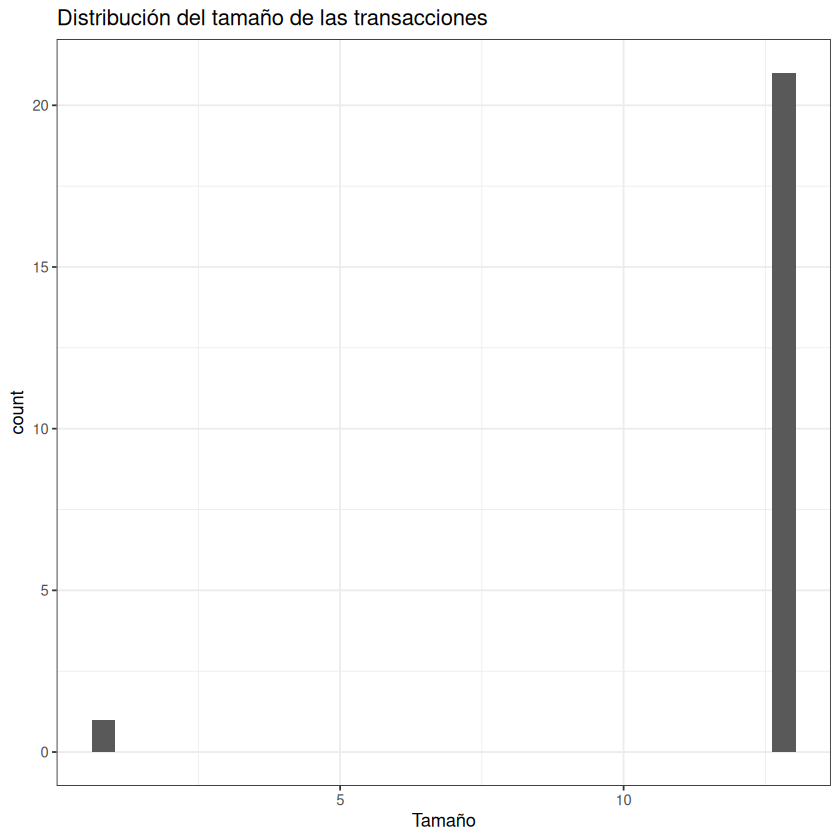

In [31]:
data.frame(tamanyos) %>%
  ggplot(aes(x = tamanyos)) +
  geom_histogram() +
  labs(
    title = "Distribución del tamaño de las transacciones",
    x = "Tamaño"
  ) +
  theme_bw()

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Este código calcula la frecuencia relativa de los elementos en las transacciones y muestra los 5 artículos más frecuentes.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>frecuencia_items <- itemFrequency(x = transacciones, type = "relative")</code>:  
                    <ul>
                        <li>Calcula la frecuencia relativa de cada artículo en el conjunto de transacciones.</li>
                        <li>La función <code>itemFrequency()</code> devuelve un vector donde cada elemento representa la frecuencia relativa de un artículo en todas las transacciones.</li>
                        <li>El parámetro <code>type = "relative"</code> especifica que se debe calcular la frecuencia relativa, es decir, la proporción de transacciones que contienen un artículo específico en lugar de su frecuencia absoluta.</li>
                    </ul>
                </li>
                <li><code>frecuencia_items %>% sort(decreasing = TRUE) %>% head(5)</code>:  
                    <ul>
                        <li>Usa la tubería <code>%>%</code> para encadenar operaciones sobre el vector de frecuencias:</li>
                        <ul>
                            <li><code>sort(decreasing = TRUE)</code>: Ordena las frecuencias de manera descendente, mostrando primero los artículos más frecuentes.</li>
                            <li><code>head(5)</code>: Muestra los primeros 5 artículos más frecuentes en el conjunto de transacciones.</li>
                        </ul>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Resultados esperados:</strong>
            <ul>
                <li>Un vector que contiene la frecuencia relativa de los artículos más frecuentes en las transacciones, ordenados de mayor a menor.</li>
                <li>La salida en consola mostrará los 5 artículos con la mayor frecuencia relativa.</li>
            </ul>
        </li>
    </ul>
</div>


In [32]:
frecuencia_items <- itemFrequency(x = transacciones, type = "relative")
frecuencia_items %>%
  sort(decreasing = TRUE) %>%
  head(5)

tiempo_reproduccion_horas bajas           cantidad de tags baja 
                      0.8181818                       0.7727273 
             suscriptores bajos                   No es popular 
                      0.7727273                       0.7272727 
                       sugerido 
                      0.6363636

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Este código utiliza el algoritmo <code>apriori</code> para encontrar conjuntos de artículos frecuentes en las transacciones, basándose en un umbral de soporte mínimo calculado dinámicamente.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>soporte <- 2 / dim(transacciones)[1]</code>:  
                    <ul>
                        <li>Calcula el soporte mínimo para los conjuntos frecuentes.</li>
                        <li><code>dim(transacciones)[1]</code> devuelve el número de transacciones en el conjunto de datos.</li>
                        <li>El soporte se define como la proporción de transacciones que deben contener un artículo o conjunto de artículos para ser considerados frecuentes. En este caso, el soporte mínimo es 2 dividido por el número total de transacciones.</li>
                    </ul>
                </li>
                <li><code>itemsets <- apriori(...)</code>:  
                    <ul>
                        <li>Aplica el algoritmo <code>apriori</code> para encontrar conjuntos de artículos frecuentes.</li>
                        <li>El parámetro <code>data = transacciones</code> indica que el conjunto de datos de transacciones se utiliza para buscar los conjuntos frecuentes.</li>
                        <li>El parámetro <code>parameter</code> define los criterios del algoritmo:
                            <ul>
                                <li><code>support = soporte</code>: Define el soporte mínimo calculado anteriormente.</li>
                                <li><code>minlen = 1</code>: Define la longitud mínima de los conjuntos de artículos (en este caso, se buscan conjuntos de al menos un artículo).</li>
                                <li><code>maxlen = 20</code>: Define la longitud máxima de los conjuntos de artículos (se consideran conjuntos de hasta 20 artículos).</li>
                                <li><code>target = "frequent itemset"</code>: Especifica que el objetivo es encontrar "conjuntos de artículos frecuentes".</li>
                            </ul>
                        </li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Resultados esperados:</strong>
            <ul>
                <li>Un objeto <code>itemsets</code> que contiene los conjuntos de artículos frecuentes que cumplen con el umbral de soporte mínimo definido.</li>
                <li>Este objeto puede ser inspeccionado para ver los conjuntos de artículos frecuentes generados por el algoritmo <code>apriori</code>.</li>
            </ul>
        </li>
    </ul>
</div>


In [33]:
soporte <- 4 / dim(transacciones)[1]
itemsets <- apriori(
  data = transacciones,
  parameter = list(
    support = soporte,
    minlen = 1,
    maxlen = 20,
    target = "frequent itemset"
  )
)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime   support minlen
         NA    0.1    1 none FALSE            TRUE       5 0.1818182      1
 maxlen            target  ext
     20 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[45 item(s), 22 transaction(s)] done [0.00s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [1735 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [34]:
# Se muestran los top 20 itemsets formados por más de un item.
# de mayor a menor soporte
top_20_itemsets <- sort(itemsets[size(itemsets) > 1], by = "support",
                        decreasing = TRUE)[1:20]
inspect(top_20_itemsets)


     items                               support count
[1]  {suscriptores bajos,                             
      tiempo_reproduccion_horas bajas} 0.7727273    17
[2]  {No es popular,                                  
      suscriptores bajos}              0.7272727    16
[3]  {No es popular,                                  
      tiempo_reproduccion_horas bajas} 0.7272727    16
[4]  {No es popular,                                  
      suscriptores bajos,                             
      tiempo_reproduccion_horas bajas} 0.7272727    16
[5]  {cantidad de tags baja,                          
      tiempo_reproduccion_horas bajas} 0.6363636    14
[6]  {cantidad de tags baja,                          
      No es popular}                   0.5909091    13
[7]  {cantidad de tags baja,                          
      suscriptores bajos}              0.5909091    13
[8]  {cantidad de tags baja,                          
      No es popular,                                  
      susc

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Este código convierte los 20 conjuntos de artículos más frecuentes en un formato adecuado para <code>ggplot2</code> y los visualiza en un gráfico de barras horizontales.</li>
        <li><strong>Operaciones realizadas:</strong>
            <ul>
                <li><code>as(sort(itemsets, by = "support", decreasing = TRUE)[1:20], Class = "data.frame")</code>:  
                    <ul>
                        <li>Convierte el objeto <code>itemsets</code> en un <code>data.frame</code> para ser utilizado en <code>ggplot</code>.</li>
                        <li><code>sort(itemsets, by = "support", decreasing = TRUE)</code> ordena los conjuntos de artículos por su soporte de manera descendente.</li>
                        <li>El parámetro <code>[1:20]</code> selecciona los primeros 20 conjuntos de artículos más frecuentes.</li>
                    </ul>
                </li>
                <li><code>ggplot(aes(x = reorder(items, support), y = support))</code>:  
                    <ul>
                        <li>Usa <code>ggplot</code> para crear un gráfico donde el eje <code>x</code> representa los nombres de los artículos (<code>items</code>) y el eje <code>y</code> representa su soporte.</li>
                        <li><code>reorder(items, support)</code> reorganiza los artículos en el eje <code>x</code> de acuerdo con su valor de soporte.</li>
                    </ul>
                </li>
                <li><code>geom_col()</code>:  
                    <ul>
                        <li>Crea un gráfico de barras utilizando los valores de soporte para cada conjunto de artículos.</li>
                    </ul>
                </li>
                <li><code>coord_flip()</code>:  
                    <ul>
                        <li>Invierte el gráfico, colocando las barras de manera horizontal en lugar de vertical.</li>
                    </ul>
                </li>
                <li><code>labs(title = "Itemsets más frecuentes", x = "itemsets")</code>:  
                    <ul>
                        <li>Establece el título del gráfico como "Itemsets más frecuentes" y la etiqueta del eje <code>x</code> como "itemsets".</li>
                    </ul>
                </li>
                <li><code>theme_bw()</code>:  
                    <ul>
                        <li>Aplica el tema blanco y negro para un estilo limpio y profesional.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Resultados esperados:</strong>
            <ul>
                <li>Un gráfico de barras horizontales que muestra los 20 conjuntos de artículos más frecuentes, ordenados por su soporte.</li>
                <li>El gráfico será generado en el visor de gráficos de R y proporcionará una visualización clara de los conjuntos de artículos con mayor soporte.</li>
            </ul>
        </li>
    </ul>
</div>


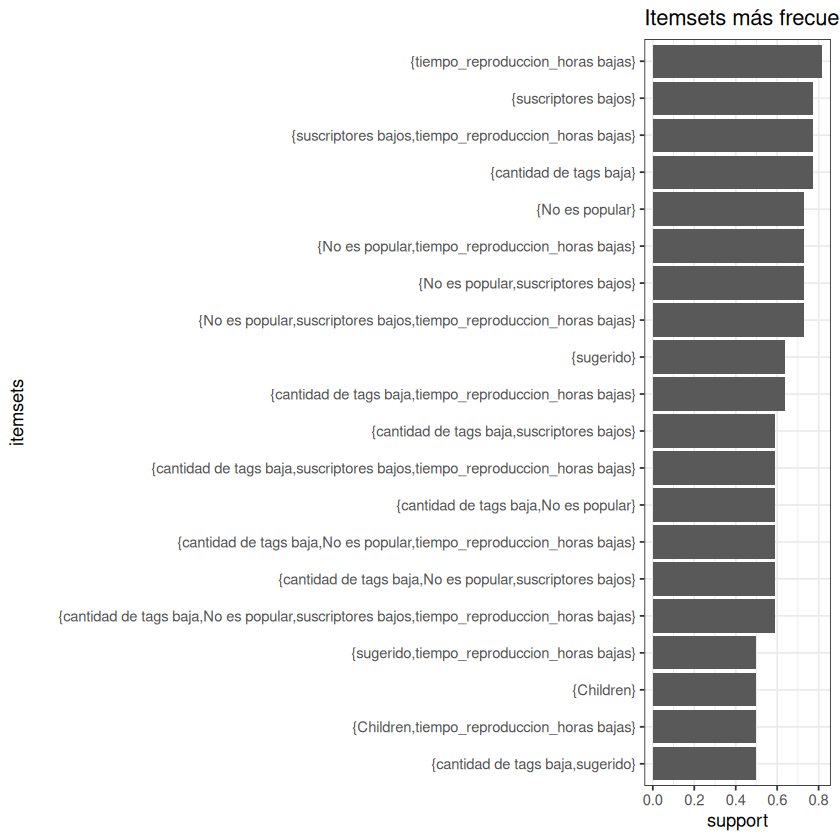

In [35]:
# Para representarlos con ggplot se convierte a dataframe
as(sort(itemsets, by = "support", decreasing = TRUE)[1:20],
   Class = "data.frame") %>%
  ggplot(aes(x = reorder(items, support), y = support)) +
  geom_col() +
  coord_flip() +
  labs(title = "Itemsets más frecuentes", x = "itemsets") +
  theme_bw()

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Esta celda filtra los itemsets generados anteriormente para que solo contengan ciertos valores de interés definidos en el vector <code>interesting_values</code>, lo que permite enfocar el análisis en los itemsets que contienen combinaciones específicas de categorías, como "vistas medias", "impresiones altas", etc.</li>
        <li><strong>Descripción detallada:</strong>
            <ul>
                <li><code>interesting_values <- c(...)</code>:  
                    <ul>
                        <li>Define un vector <code>interesting_values</code> con una lista de categorías de interés relacionadas con las características de los datos (por ejemplo, "vistas medias", "impresiones altas", "suscriptores altos", etc.). Este vector contiene las combinaciones que se buscan en los itemsets.</li>
                    </ul>
                </li>
                <li><code>itemsets_filtrado <- arules::subset(itemsets, subset = items %in% interesting_values)</code>:  
                    <ul>
                        <li>Utiliza la función <code>subset()</code> del paquete <code>arules</code> para filtrar los itemsets en función de los elementos del vector <code>interesting_values</code>.</li>
                        <li><code>%in%</code> es un operador que verifica si los items de los itemsets están presentes en el vector <code>interesting_values</code>.</li>
                        <li>El resultado es un conjunto filtrado de itemsets que solo contiene aquellos que tienen items que coinciden con las categorías definidas en el vector.</li>
                    </ul>
                </li>
                <li><code>itemsets_filtrado</code>:  
                    <ul>
                        <li>Muestra los itemsets filtrados que cumplen con los criterios establecidos (es decir, que contienen elementos de <code>interesting_values</code>).</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Ventajas de saber esto de antemano:</strong>
            <ul>
                <li>Este filtrado permite que el análisis se enfoque solo en los itemsets más relevantes, lo que mejora la eficiencia y precisión del estudio.</li>
                <li>El uso del operador <code>%in%</code> con un vector predefinido facilita la identificación de patrones y asociaciones de interés, sin tener que revisar manualmente todos los posibles itemsets.</li>
                <li>Al concentrarse en categorías específicas, este enfoque reduce el volumen de datos procesados y mejora la comprensión de las relaciones entre las características clave del conjunto de datos.</li>
                <li>El filtrado basado en valores predefinidos permite un análisis dirigido y puede ser útil para investigaciones o análisis posteriores que se centren en ciertas combinaciones de atributos.</li>
            </ul>
        </li>
    </ul>
</div>


In [36]:
interesting_values <- c(
  "vistas medias", "vistas altas",
  "impresiones medias", "impresiones altas",
  "suscriptores media", "suscriptores altos",
  "tiempo_reproduccion_horas medias", "tiempo_reproduccion_horas altas",
  "duracion_promedio_vistas medias", "duracion_promedio_vistas altas"
)

itemsets_filtrado <- arules::subset(itemsets,
  subset = items %in% interesting_values
)
itemsets_filtrado

set of 425 itemsets 

In [37]:
# Se muestran 10 de ellos
inspect(itemsets_filtrado[1:20])

     items                                support count
[1]  {duracion_promedio_vistas altas}   0.1818182     4
[2]  {impresiones medias}               0.2272727     5
[3]  {vistas altas}                     0.3181818     7
[4]  {vistas medias}                    0.3181818     7
[5]  {duracion_promedio_vistas medias}  0.3636364     8
[6]  {impresiones altas}                0.3636364     8
[7]  {duracion_promedio_vistas altas,                  
      impresiones altas}                0.1818182     4
[8]  {duracion_promedio_vistas altas,                  
      General}                          0.1818182     4
[9]  {duracion_promedio_vistas altas,                  
      sugerido}                         0.1818182     4
[10] {cantidad de tags baja,                           
      duracion_promedio_vistas altas}   0.1818182     4
[11] {impresiones medias,                              
      vistas medias}                    0.1818182     4
[12] {duracion_promedio_vistas medias,          

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Esta celda genera reglas de asociación utilizando el algoritmo Apriori sobre el conjunto de transacciones. Las reglas se crean con un umbral mínimo de soporte y confianza, lo que ayuda a identificar asociaciones significativas entre los ítems en las transacciones.</li>
        <li><strong>Descripción detallada:</strong>
            <ul>
                <li><code>soporte <- 8 / dim(transacciones)[1]</code>:  
                    <ul>
                        <li>Define el valor de soporte mínimo para las reglas de asociación. El soporte se calcula como el número 8 dividido por el número total de transacciones (obtenido con <code>dim(transacciones)[1]</code>). Este soporte indica cuántas transacciones deben contener un ítem para que una regla sea considerada válida.</li>
                    </ul>
                </li>
                <li><code>reglas <- apriori(data = transacciones, parameter = list(...))</code>:  
                    <ul>
                        <li>Aplica el algoritmo Apriori para generar las reglas de asociación a partir del conjunto de transacciones. El parámetro <code>data = transacciones</code> indica el conjunto de datos sobre el cual se aplicará el algoritmo.</li>
                        <li><code>parameter = list(support = soporte, confidence = 0.70, target = "rules")</code>:
                            <ul>
                                <li><code>support = soporte</code>: El valor de soporte mínimo establecido previamente se utiliza para filtrar las reglas. Solo las reglas con un soporte mayor o igual a este valor serán consideradas.</li>
                                <li><code>confidence = 0.70</code>: Establece el valor mínimo de confianza para las reglas, es decir, la probabilidad de que la consecuencia de la regla ocurra dado que la condición se cumple. En este caso, solo se considerarán reglas con una confianza de al menos 70%.</li>
                                <li><code>target = "rules"</code>: Especifica que el objetivo del algoritmo es generar reglas de asociación.</li>
                            </ul>
                        </li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>


In [38]:
soporte <- 8 / dim(transacciones)[1]
reglas <- apriori(
  data = transacciones,
  parameter = list(
    support = soporte,
    confidence = 0.70,
    # Se especifica que se creen reglas
    target = "rules"
  )
)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime   support minlen
        0.7    0.1    1 none FALSE            TRUE       5 0.3636364      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[45 item(s), 22 transaction(s)] done [0.00s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [143 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Esta celda calcula dos métricas adicionales, el <strong>coverage</strong> y el <strong>Fisher's Exact Test</strong>, para las reglas generadas por el algoritmo Apriori. Estas métricas permiten evaluar la calidad de las reglas en términos de su cobertura en las transacciones y la significancia estadística.</li>
        <li><strong>Descripción detallada:</strong>
            <ul>
                <li><code>interestMeasure(reglas, measure = c("coverage", "fishersExactTest"), transactions = transacciones)</code>:  
                    <ul>
                        <li>La función <code>interestMeasure()</code> calcula varias métricas de interés para las reglas generadas. En este caso, se están calculando dos métricas: <strong>coverage</strong> y <strong>Fisher's Exact Test</strong>.</li>
                        <li><strong>Coverage</strong>:  
                            <ul>
                                <li>es el soporte de la parte izquierda de la regla (antecedente). Se interpreta como la frecuencia con la que el antecedente aparece en el conjunto de transacciones.</li>
                            </ul>
                        </li>
                        <li><strong>Fisher's Exact Test</strong>:  
                            <ul>
                                <li>Este test calcula el valor p asociado con la probabilidad de que la regla haya ocurrido por azar.</li>
                                <li><strong>Interpretación:</strong> Un valor p bajo (generalmente menor que 0.05) indica que la regla es estadísticamente significativa, es decir, es poco probable que haya ocurrido por azar.</li>
                            </ul>
                        </li>
                    </ul>
                </li>
                <li><code>metricas</code>:  
                    <ul>
                        <li>El resultado de la función <code>interestMeasure()</code> se almacena en la variable <code>metricas</code>, que contiene las métricas calculadas para cada regla. Esto permite evaluar la calidad de las reglas en términos de su cobertura y significancia estadística.</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>


In [74]:
metricas <- interestMeasure(reglas,
  measure = c("coverage", "fishersExactTest"),
  transactions = transacciones
)
head(metricas)

,coverage,fishersExactTest
,<dbl>,<dbl>
1,1.0000000,1.00000000
2,1.0000000,1.00000000
3,1.0000000,1.00000000
4,1.0000000,1.00000000
5,0.3636364,0.04024768
6,0.3636364,0.07602339


<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Esta celda agrega métricas adicionales a las reglas generadas y luego las convierte a un formato de <code>data.frame</code> para facilitar su visualización y análisis, ordenando las reglas por su nivel de confianza de manera descendente.</li>
        <li><strong>Descripción detallada:</strong>
            <ul>
                <li><code>quality(reglas) <- cbind(quality(reglas), metricas)</code>:  
                    <ul>
                        <li>Esta línea de código agrega las métricas adicionales al objeto de reglas. La función <code>quality()</code> se usa para acceder a las métricas actuales de las reglas, y <code>cbind()</code> se usa para combinar las métricas existentes con nuevas métricas, en este caso representadas por el objeto <code>metricas</code>.</li>
                    </ul>
                </li>
                <li><code>df_reglas <- as(reglas, Class = "data.frame")</code>:  
                    <ul>
                        <li>Convierte el objeto <code>reglas</code> (un objeto del tipo <code>rules</code>) a un <code>data.frame</code>. Este paso facilita la visualización y análisis de las reglas, ya que permite tratar las reglas como una tabla tradicional de R en lugar de trabajar con un objeto más especializado y menos accesible.</li>
                    </ul>
                </li>
                <li><code>df_reglas %>% as.tibble() %>% arrange(desc(confidence)) %>% head()</code>:  
                    <ul>
                        <li>Convierte el <code>data.frame</code> a un <code>tibble</code> para una visualización más conveniente y legible, utilizando la función <code>as.tibble()</code>.</li>
                        <li>Luego, las reglas se ordenan en orden descendente según la columna <code>confidence</code>, lo que asegura que las reglas con mayor confianza aparezcan primero. Esto se logra con <code>arrange(desc(confidence))</code>.</li>
                        <li>Finalmente, <code>head()</code> muestra las primeras 6 reglas ordenadas por su confianza, lo que proporciona una visión rápida de las reglas más confiables en el conjunto de datos.</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>


In [40]:
quality(reglas) <- cbind(quality(reglas), metricas)
df_reglas <- as(reglas, Class = "data.frame")
df_reglas %>%
  as.tibble() %>%
  arrange(desc(confidence)) %>%
  head()

rules,support,confidence,coverage,lift,count,coverage.1,fishersExactTest
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
{impresiones bajas} => {No es popular},0.3636364,1,0.3636364,1.375000,8,0.3636364,0.040247678
{impresiones bajas} => {suscriptores bajos},0.3636364,1,0.3636364,1.294118,8,0.3636364,0.076023392
{impresiones bajas} => {tiempo_reproduccion_horas bajas},0.3636364,1,0.3636364,1.222222,8,0.3636364,0.136842105
{impresiones altas} => {sugerido},0.3636364,1,0.3636364,1.571429,8,0.3636364,0.009391125
{ctr bajo} => {cantidad de tags baja},0.4090909,1,0.4090909,1.294118,9,0.4090909,0.048872180
{Children} => {tiempo_reproduccion_horas bajas},0.5000000,1,0.5000000,1.222222,11,0.5000000,0.045112782


<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <ul>
        <li><strong>Propósito general:</strong> Esta celda genera reglas de asociación donde se especifican los valores de los elementos en el lado izquierdo (antecedentes, <code>lhs</code>) y en el lado derecho (consecuentes, <code>rhs</code>) de las reglas, utilizando el algoritmo Apriori con soporte y confianza definidos. Luego, se ordenan y visualizan las reglas generadas basadas en su nivel de confianza.</li>
        <li><strong>Descripción detallada:</strong>
            <ul>
                <li><code>lhs_values <- c("Blue", "Pink", "Yellow", "Purple", "White", "Gray", "Beige", "Indigo")</code>:  
                    <ul>
                        <li>Se define un vector <code>lhs_values</code> que contiene los valores que se buscan en el lado izquierdo de las reglas (antecedentes). Estos valores representan los ítems que deben estar presentes en una transacción para que la regla se aplique.</li>
                    </ul>
                </li>
                <li><code>rhs_values <- c("impresiones medias", "suscriptores media", "vistas altas", "vistas medias", "ctr alto", "ctr medio")</code>:  
                    <ul>
                        <li>Se define un vector <code>rhs_values</code> que contiene los valores que se esperan en el lado derecho de las reglas (consecuentes). Estos valores representan los ítems que deben ocurrir en una transacción dada, si los antecedentes (lhs) se cumplen.</li>
                    </ul>
                </li>
                <li><code>soporte <- 2 / dim(transacciones)[1]</code>:  
                    <ul>
                        <li>El soporte mínimo para las reglas se calcula como el valor 2 dividido por el número total de transacciones, lo que establece el umbral a partir del cual se generarán las reglas.</li>
                    </ul>
                </li>
                <li><code>interesting_consequents_values <- apriori(data = transacciones, parameter = list(support = soporte, confidence = 0.70, target = "rules"), appearance = list(lhs = lhs_values, rhs = rhs_values), control = list(verbose = FALSE))</code>:  
                    <ul>
                        <li>Esta línea genera las reglas de asociación con el algoritmo Apriori. Se especifica el conjunto de transacciones <code>data = transacciones</code>, el soporte mínimo y la confianza de al menos 70% con <code>parameter = list(support = soporte, confidence = 0.70)</code>.</li>
                        <li>Además, se limita el conjunto de reglas a aquellas que tienen los valores especificados en <code>lhs_values</code> (antecedentes) y <code>rhs_values</code> (consecuentes), utilizando el parámetro <code>appearance = list(lhs = lhs_values, rhs = rhs_values)</code>.</li>
                        <li><code>control = list(verbose = FALSE)</code> asegura que el proceso no muestre información detallada mientras ejecuta el algoritmo.</li>
                    </ul>
                </li>
                <li><code>data_frame <- as(interesting_consequents_values, Class = "data.frame")</code>:  
                    <ul>
                        <li>Convierte las reglas generadas en un <code>data.frame</code>, lo que permite trabajar con ellas en un formato tabular más accesible para análisis adicionales.</li>
                    </ul>
                </li>
                <li><code>data_frame %>% as.tibble() %>% arrange(desc(confidence)) %>% head()</code>:  
                    <ul>
                        <li>Convierte el <code>data.frame</code> a un <code>tibble</code> para mejorar la legibilidad. Luego, ordena las reglas por el nivel de confianza en orden descendente usando <code>arrange(desc(confidence))</code>, y muestra las primeras 6 reglas con <code>head()</code>.</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>


In [81]:
lhs_values <- c("Blue", "Dark Blue", "Red", "cantidad de tags baja",
                "cantidad de tags media", "cantidad de tags alta",
                "Trivia Facts Quiz", "General", "Children", "Would You Rather",
                "Thursday", "Friday", "Sunday", "Tuesday")
rhs_values <- c("impresiones medias", "impresiones altas",
                "suscriptores media", "suscriptores altos",
                "vistas altas", "vistas medias", "ctr alto", "ctr medio",
                "sugerido", "Es popular", "duracion_promedio_vistas medias")

soporte <- 2 / dim(transacciones)[1]
interesting_consequents_values <- apriori(data = transacciones,
                                          parameter = list(support = soporte,
                                                           confidence = 0.70,
                                                       # Se especifica que se creen reglas # nolint
                                                       target = "rules"),
                                          appearance = list(lhs = lhs_values,
                                                            rhs = rhs_values),
                                          control = list(verbose = FALSE))



if (length(interesting_consequents_values) == 0) {
  print("No se han encontrado reglas")
} else {
  metrics <- interestMeasure(interesting_consequents_values,
    measure = c("fishersExactTest"),
    transactions = transacciones
  )
  quality(interesting_consequents_values) <- cbind(quality(interesting_consequents_values), metrics) # nolint
  data_frame <- as(interesting_consequents_values, Class = "data.frame")
  data_frame %>%
    as.tibble() %>%
    arrange(metrics) %>%
    head(25)
}


rules,support,confidence,coverage,lift,count,metrics
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
{General} => {impresiones altas},0.31818182,0.70,0.45454545,1.925000,7,0.004643963
"{cantidad de tags baja,General} => {impresiones altas}",0.27272727,0.75,0.36363636,2.062500,6,0.008321606
"{Dark Blue,General} => {suscriptores media}",0.09090909,1.00,0.09090909,7.333333,2,0.012987013
"{Dark Blue,General,Thursday} => {suscriptores media}",0.09090909,1.00,0.09090909,7.333333,2,0.012987013
"{cantidad de tags baja,Dark Blue,General} => {suscriptores media}",0.09090909,1.00,0.09090909,7.333333,2,0.012987013
"{cantidad de tags baja,Dark Blue,General,Thursday} => {suscriptores media}",0.09090909,1.00,0.09090909,7.333333,2,0.012987013
{cantidad de tags alta} => {ctr medio},0.13636364,1.00,0.13636364,2.750000,3,0.036363636
{cantidad de tags alta} => {duracion_promedio_vistas medias},0.13636364,1.00,0.13636364,2.750000,3,0.036363636
"{General,Would You Rather} => {impresiones altas}",0.13636364,1.00,0.13636364,2.750000,3,0.036363636


<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <h2>Conclusión</h2>  
</div>  
<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <p>
        Los resultados obtenidos mediante el algoritmo Apriori sobre los datos del canal de YouTube <strong>The Quiz Challenge</strong> destacan factores clave asociados al desempeño de sus videos. Los valores en el campo <i>metrics</i>, todos aquellos menores a 0.05, indican que las asociaciones encontradas son estadísticamente significativas. Un hallazgo interesante es la relación entre el uso de pocos tags (clasificados como "bajo") y el éxito de los videos. Esto puede atribuirse a que sus videos más populares suelen utilizar entre 5 y 7 tags, un rango considerado "bajo" según la clasificación.  
        Asimismo, se observa que los colores y los días de la semana tienen un impacto notable. Los videos asociados al color "Dark Blue" publicados en días como el jueves presentan un <i>lift</i> elevado (7.33), indicando que estos elementos podrían estar vinculados a un mejor rendimiento en términos de suscriptores o impresiones. Estos hallazgos subrayan la importancia de optimizar el contenido no solo en términos de temática general, sino también atendiendo a detalles específicos como colores, días de publicación y cantidad adecuada de tags relacionados al contenido.
    </p>
</div>  

<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    
   ##  Bibliografía
</div>
<div style="background-color: #FFFFE0; font-family: 'Times New Roman'; padding: 10px;">    
    <p>
        Reglas de asociación y algoritmo Apriori con R por Joaquín Amat Rodrigo, disponible con licencia CC BY-NC-SA 4.0 en <a href="https://www.cienciadedatos.net/documentos/43_reglas_de_asociacion">https://www.cienciadedatos.net/documentos/43_reglas_de_asociacion</a>
    </p>
</div>
